<a href="https://colab.research.google.com/github/AhmedElbashir/UAE-Real-State/blob/main/UAE_Real_State.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UAE House Prices Predictions**

## **Project Life Cycle**

In [1]:
# @title
#from IPython.display import Image

# Provide the path to your image file
#image_path = '/content/Presentation1.png'

# Display the image
#Image(filename=image_path)

## **1. Executive Summary**

### **The objective of this project was to build a predictive model to accurately estimate property prices in the UAE real estate market. Various regression models were evaluated for their effectiveness in predicting property prices based on multiple features such as area, number of bedrooms, bathrooms, building type, district, and city.**
###**Based on the evaluation metrics, Random Forest Regression and Gradient Boosting Regression emerged as the best models for predicting property prices in the UAE real estate market. Both models demonstrated high accuracy with R2 scores above 0.96 and significantly lower MSE values compared to Linear and Lasso Regression. The superior performance of these models suggests that they are better suited for capturing the complex relationships between property features and prices. Therefore, for future predictive modeling tasks in the real estate sector, we recommend prioritizing the use of ensemble methods such as Random Forest and Gradient Boosting for their robust predictive capabilities.**

## **2. Introduction**

### **The United Arab Emirates' real estate market is a dynamic and rapidly evolving sector that presents significant opportunities for investors, developers, and stakeholders. Our project aims to leverage advanced data science techniques to predict property prices in this burgeoning market, providing invaluable insights and fostering data-driven decision-making.Through this project, we will explore various machine learning algorithms, perform extensive data preprocessing and feature engineering, and conduct thorough model evaluation to ensure high accuracy and robustness. Additionally, we will develop a user-friendly interface to make the model’s predictions easily accessible to users.**

## **3. Loading and Exploring Data**

In [2]:
# @title **3.1 Loading libraries**

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.set()
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
import re
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge,Lasso, ElasticNet
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
!pip install shap
import shap
import statsmodels.api as sm
import folium
from matplotlib.ticker import FuncFormatter
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import skew, probplot
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import joblib
from joblib import dump, load
from scipy import stats
!pip install streamlit
import streamlit as st

In [3]:
# @title **3.2 Import Data - Data Size - Data structure**
prop = pd.read_csv('/content/drive/MyDrive/RealState-Data/Uae_new_prop.csv')
prop.head()




,Name,Building_Type,Latitude,Longitude,Area,Bedrooms,Bathrooms,City,District,Price
0,Well-Maintained 2BR | Partial Sea and Canal View,Apartment,24.451383,54.604539,"1,547",2,3.0,Abu Dhabi,Al Raha Beach,2100000
1,Mid Unit | Double Row | Deluxe Layout | Prime ...,Residence,24.496453,54.624243,"1,816",2,3.0,Abu Dhabi,Yas Island,2150000
2,BOOK NOW | Double Row Villa | Ready to Occupy,House,24.453478,54.670905,"1,873",3,4.0,Abu Dhabi,Al Reef,1550000
3,Well Maintained | Large Garden | Great Location,House,24.453938,54.674486,"1,263",2,3.0,Abu Dhabi,Al Reef,1100000
4,Well Maintained | Arabian Style | Great Location,House,24.459214,54.673163,"1,832",2,3.0,Abu Dhabi,Al Reef,1100000


In [4]:
# @title
prop.shape

(45350, 10)

In [5]:
# @title
prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45350 entries, 0 to 45349
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           45350 non-null  object 
 1   Building_Type  45350 non-null  object 
 2   Latitude       45350 non-null  float64
 3   Longitude      45350 non-null  float64
 4   Area           45350 non-null  object 
 5   Bedrooms       45350 non-null  int64  
 6   Bathrooms      45344 non-null  float64
 7   City           45350 non-null  object 
 8   District       45350 non-null  object 
 9   Price          45350 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 3.5+ MB


In [6]:
# @title **3.3 Data Preprocessing**
def extract_view(Name):
    match = re.search(r'\b(\w+ View)\b', str(Name))
    if match:
        return match.group(1).strip()
    return None

# Apply the function to create a new column 'view'
prop['View'] = prop['Name'].apply(extract_view)
def extract_keywords(text, n_keywords=5):
    vectorizer = CountVectorizer(stop_words='english', max_features=n_keywords)
    try:
        X = vectorizer.fit_transform([str(text)])
        keywords = vectorizer.get_feature_names_out()
        return ', '.join(keywords) if keywords.size > 0 else "no keywords"
    except ValueError:
        return "no keywords"

prop['Bulding_Descripton'] = prop['Name'].apply(lambda x: extract_keywords(str(x), n_keywords=5))

prop.head()

,Name,Building_Type,Latitude,Longitude,Area,Bedrooms,Bathrooms,City,District,Price,View,Bulding_Descripton
0,Well-Maintained 2BR | Partial Sea and Canal View,Apartment,24.451383,54.604539,"1,547",2,3.0,Abu Dhabi,Al Raha Beach,2100000,Canal View,"2br, canal, maintained, partial, sea"
1,Mid Unit | Double Row | Deluxe Layout | Prime ...,Residence,24.496453,54.624243,"1,816",2,3.0,Abu Dhabi,Yas Island,2150000,None,"area, deluxe, double, layout, mid"
2,BOOK NOW | Double Row Villa | Ready to Occupy,House,24.453478,54.670905,"1,873",3,4.0,Abu Dhabi,Al Reef,1550000,None,"book, double, occupy, ready, row"
3,Well Maintained | Large Garden | Great Location,House,24.453938,54.674486,"1,263",2,3.0,Abu Dhabi,Al Reef,1100000,None,"garden, great, large, location, maintained"
4,Well Maintained | Arabian Style | Great Location,House,24.459214,54.673163,"1,832",2,3.0,Abu Dhabi,Al Reef,1100000,None,"arabian, great, location, maintained, style"


In [7]:
# @title
prop.columns = prop.columns.str.strip()
prop['Area'] = prop['Area'].str.replace(',', '').astype(float)
#Price per Square feet
prop['Price_per_Sqft'] = prop['Price'] / prop['Area']
#Average Property Price for the City
City_avg_price = prop.groupby('City')['Price'].mean().to_dict()
prop['City_Avg_Price'] = prop['City'].map(City_avg_price)
prop.drop(columns=['Name'], axis=1, inplace= True)
prop.head()

,Building_Type,Latitude,Longitude,Area,Bedrooms,Bathrooms,City,District,Price,View,Bulding_Descripton,Price_per_Sqft,City_Avg_Price
0,Apartment,24.451383,54.604539,1547.0,2,3.0,Abu Dhabi,Al Raha Beach,2100000,Canal View,"2br, canal, maintained, partial, sea",1357.466063,3.847711e+06
1,Residence,24.496453,54.624243,1816.0,2,3.0,Abu Dhabi,Yas Island,2150000,None,"area, deluxe, double, layout, mid",1183.920705,3.847711e+06
2,House,24.453478,54.670905,1873.0,3,4.0,Abu Dhabi,Al Reef,1550000,None,"book, double, occupy, ready, row",827.549386,3.847711e+06
3,House,24.453938,54.674486,1263.0,2,3.0,Abu Dhabi,Al Reef,1100000,None,"garden, great, large, location, maintained",870.942201,3.847711e+06
4,House,24.459214,54.673163,1832.0,2,3.0,Abu Dhabi,Al Reef,1100000,None,"arabian, great, location, maintained, style",600.436681,3.847711e+06


In [8]:
# @title
# Create a new column named 'Id' as the index
prop['Id'] = range(len(prop))

# Set 'Id' as the first column
first_column = prop.pop('Id')
prop.insert(0, 'Id', first_column)

# Move the 'Price' column to the last
last_column = prop.pop('Price')
prop.insert(len(prop.columns), 'Price', last_column)
prop.set_index('Id', inplace=True)

# Print the first few rows of the modified DataFrame
prop.head()

,Building_Type,Latitude,Longitude,Area,Bedrooms,Bathrooms,City,District,View,Bulding_Descripton,Price_per_Sqft,City_Avg_Price,Price
Id,,,,,,,,,,,,,
0,Apartment,24.451383,54.604539,1547.0,2,3.0,Abu Dhabi,Al Raha Beach,Canal View,"2br, canal, maintained, partial, sea",1357.466063,3.847711e+06,2100000
1,Residence,24.496453,54.624243,1816.0,2,3.0,Abu Dhabi,Yas Island,None,"area, deluxe, double, layout, mid",1183.920705,3.847711e+06,2150000
2,House,24.453478,54.670905,1873.0,3,4.0,Abu Dhabi,Al Reef,None,"book, double, occupy, ready, row",827.549386,3.847711e+06,1550000
3,House,24.453938,54.674486,1263.0,2,3.0,Abu Dhabi,Al Reef,None,"garden, great, large, location, maintained",870.942201,3.847711e+06,1100000
4,House,24.459214,54.673163,1832.0,2,3.0,Abu Dhabi,Al Reef,None,"arabian, great, location, maintained, style",600.436681,3.847711e+06,1100000


## **4. Exploratory Data Analysis**

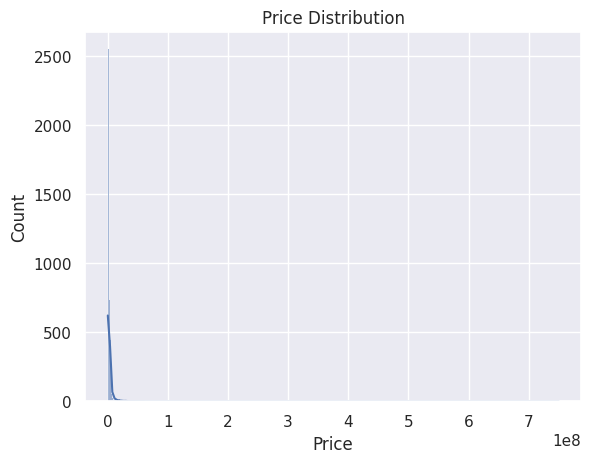

In [9]:
#@title **4.1 Price distribution**

# Price distribution
# Analyze the distribution of property prices.
sns.histplot(prop['Price'], kde=True)
plt.title('Price Distribution')
plt.show()

**The histogram shows that most properties are clustered around certain price ranges. The peak around the 1 million price mark indicates that a significant number of properties are priced in that range.The distribution is right-skewed (positively skewed), meaning there are more properties at lower prices with a tail extending towards higher prices. This is typical in real estate markets where a few properties are extremely expensive compared to the majority.**

There are 8 numeric variables.


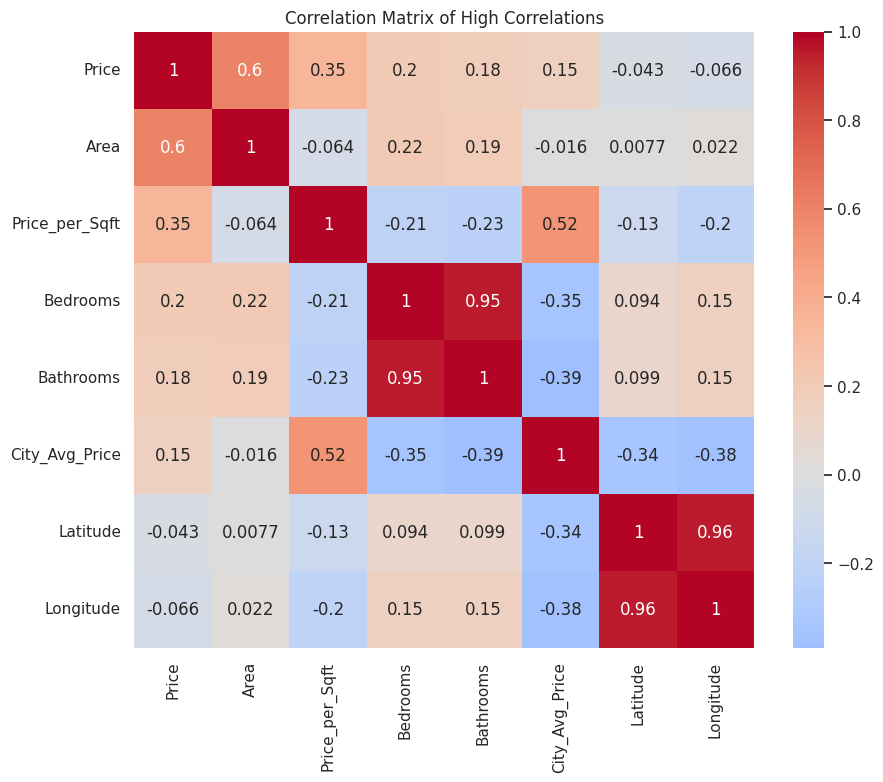

In [10]:
#@title **4.2 Correlation Matrix of High Correlations**
# Get the numeric variables
numeric_vars = prop.select_dtypes(include='number')  # Select numeric columns

# Save the names of numeric variables
numeric_var_names = numeric_vars.columns.tolist()  # Get the names of numeric columns

# Output the count of numeric variables
print(f'There are {len(numeric_var_names)} numeric variables.')
all_numVar = prop[numeric_var_names]

# Calculate correlations of all numeric variables
cor_numVar = all_numVar.corr(method='pearson')

# Sort on decreasing correlations with 'Price'
cor_sorted = cor_numVar['Price'].sort_values(ascending=False).to_frame()

# Select only high correlations
CorHigh = cor_sorted[cor_sorted.abs() > 0.5].index

# Filter the correlation matrix for high correlations
cor_numVar = cor_numVar.loc[CorHigh, CorHigh]

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cor_numVar, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of High Correlations')
plt.show()


1. Price and Area: There is a moderate positive correlation (0.43) between
   Price and Area, indicating that larger properties tend to have higher prices.
2. Price and Bedrooms: A moderate positive correlation (0.41) exists between
   Price and Bedrooms, suggesting that properties with more bedrooms are generally priced higher.
3. Price and Price_per_SqM: A moderate positive correlation (0.38) shows that
   properties with a higher price per square meter tend to have higher overall prices.
4. Price and Bathrooms: There is a moderate positive correlation (0.35) between
   Price and Bathrooms, indicating that properties with more bathrooms are generally more expensive.







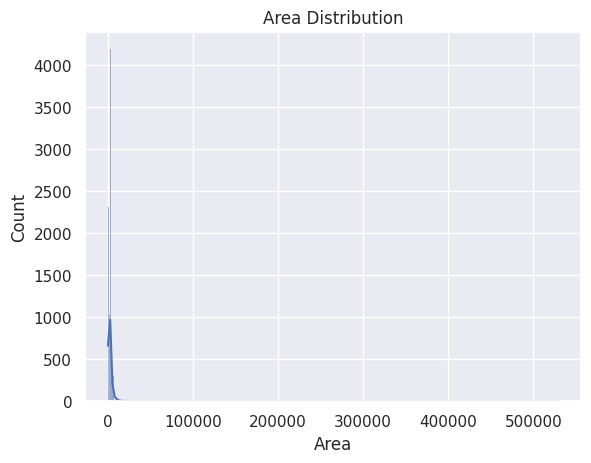

In [11]:
#@title **4.3  Area distribution**
# Area distribution
# Analyze the distribution of property areas.
sns.histplot(prop['Area'], kde=True)
plt.title('Area Distribution')
plt.show()

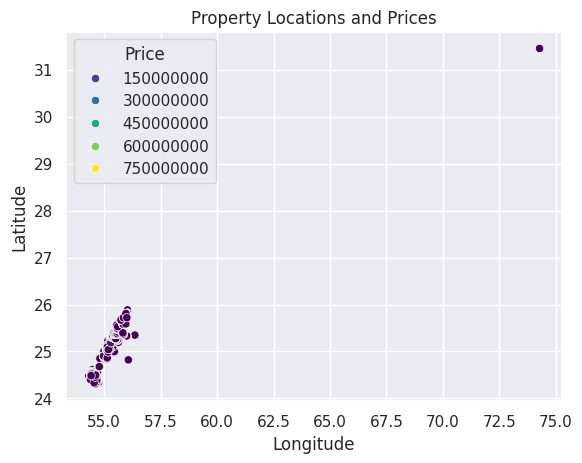

In [12]:
sns.scatterplot(x='Longitude', y='Latitude', hue='Price', data=prop, palette='viridis')
plt.title('Property Locations and Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

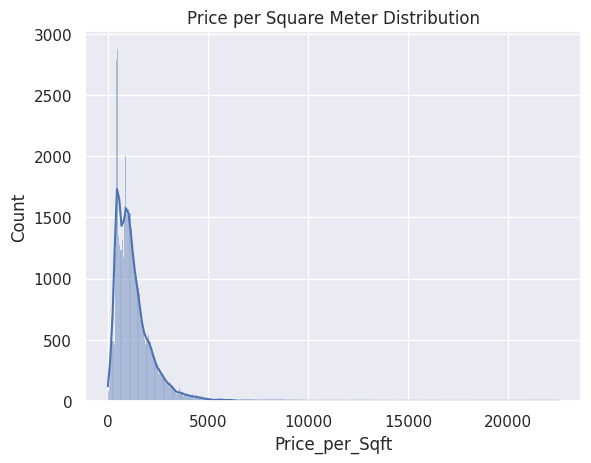

In [13]:
#@title **4.4 Price per Square Meter Distribution**
sns.histplot(prop['Price_per_Sqft'], kde=True)
plt.title('Price per Square Meter Distribution')
plt.show()

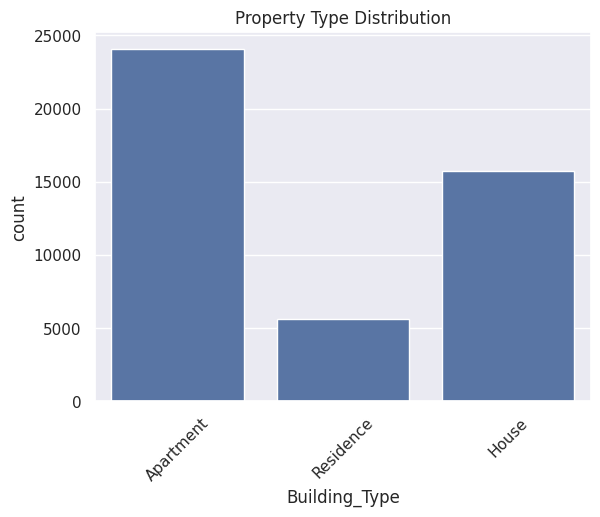

In [14]:
#@title **4.5 Property type distribution**
# Analyze the distribution of property types.
sns.countplot(x='Building_Type', data=prop)
plt.title('Property Type Distribution')
plt.xticks(rotation=45)
plt.show()

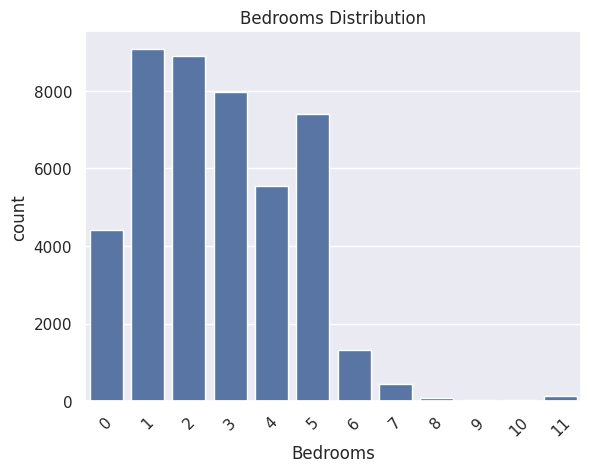

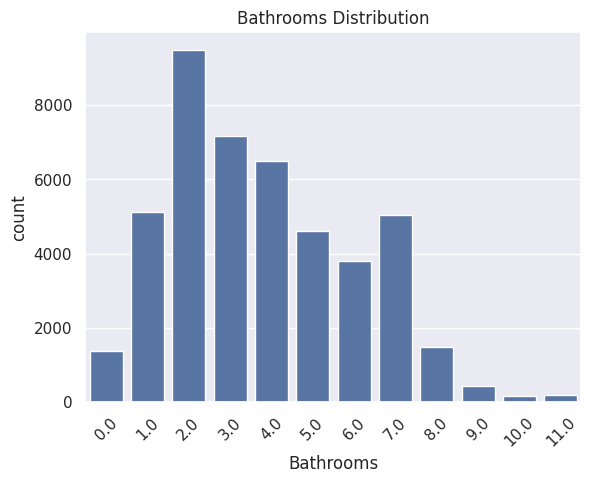

In [15]:
#@title **4.6 Bedrooms and Bathrooms Distribution**
sns.countplot(x='Bedrooms', data=prop)
plt.title('Bedrooms Distribution')
plt.xticks(rotation=45)
plt.show()
sns.countplot(x='Bathrooms', data=prop)
plt.title('Bathrooms Distribution')
plt.xticks(rotation=45)
plt.show()

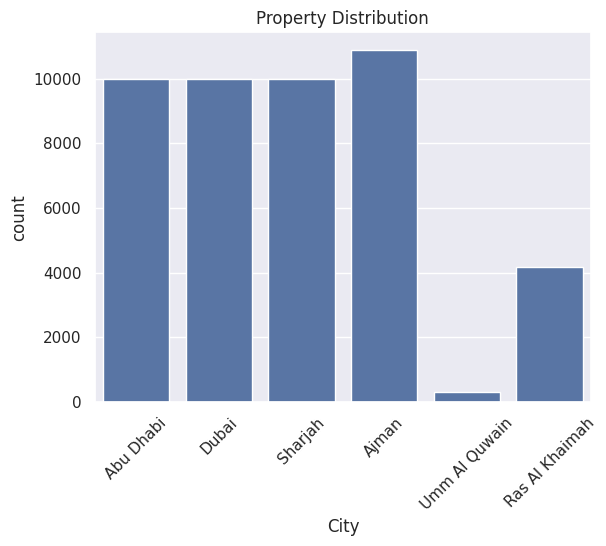

In [16]:
#@title **4.7 Property Distribution Per City**
sns.countplot(x='City', data=prop)
plt.title('Property Distribution')
plt.xticks(rotation=45)
plt.show()

City with the highest average price: Umm Al Quwain


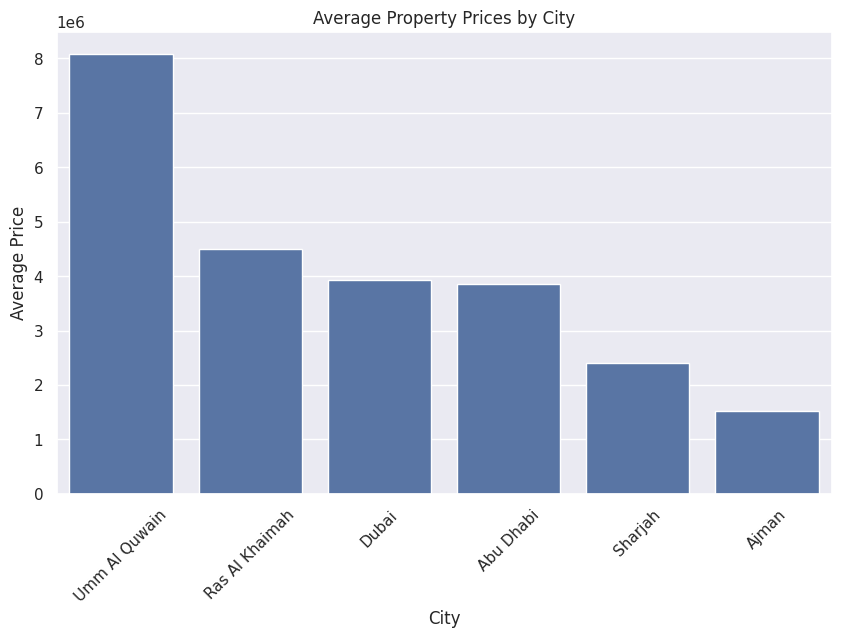

In [17]:
#@title **4.8 City with the highest average price**
# Group the data by city and calculate the average price for each city
Region_avg_price = prop.groupby('City')['Price'].mean().sort_values(ascending=False)

# Print the city with the highest average price
print("City with the highest average price:", Region_avg_price.index[0])

# Create a bar plot to visualize the average prices by city
plt.figure(figsize=(10, 6))
sns.barplot(x=Region_avg_price.index, y=Region_avg_price.values)
plt.title('Average Property Prices by City')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


Top 20 districts with the highest average prices:
 District
Emirates Hills                 5.745000e+07
Dafan Al Khor                  4.485000e+07
The World Islands              3.686300e+07
Umm Al Sheif                   3.300000e+07
Nurai Island                   3.208331e+07
Marina Village                 3.038462e+07
Palm Jebel Ali                 2.964744e+07
Al Khalidiyah                  2.725000e+07
Pearl Jumeirah                 2.700000e+07
Jumeirah Islands               2.399932e+07
Ghantoot                       2.332917e+07
Al Gurm                        1.947922e+07
Al Hudayriat Island            1.817244e+07
The Ritz-Carlton Residences    1.803871e+07
Nad Al Hamar                   1.800000e+07
Nareel Island                  1.788235e+07
Jumeirah                       1.708894e+07
Cornich Ras Al Khaimah         1.675000e+07
Al Seanneeah                   1.615975e+07
Palm Jumeirah                  1.534421e+07
Name: Price, dtype: float64


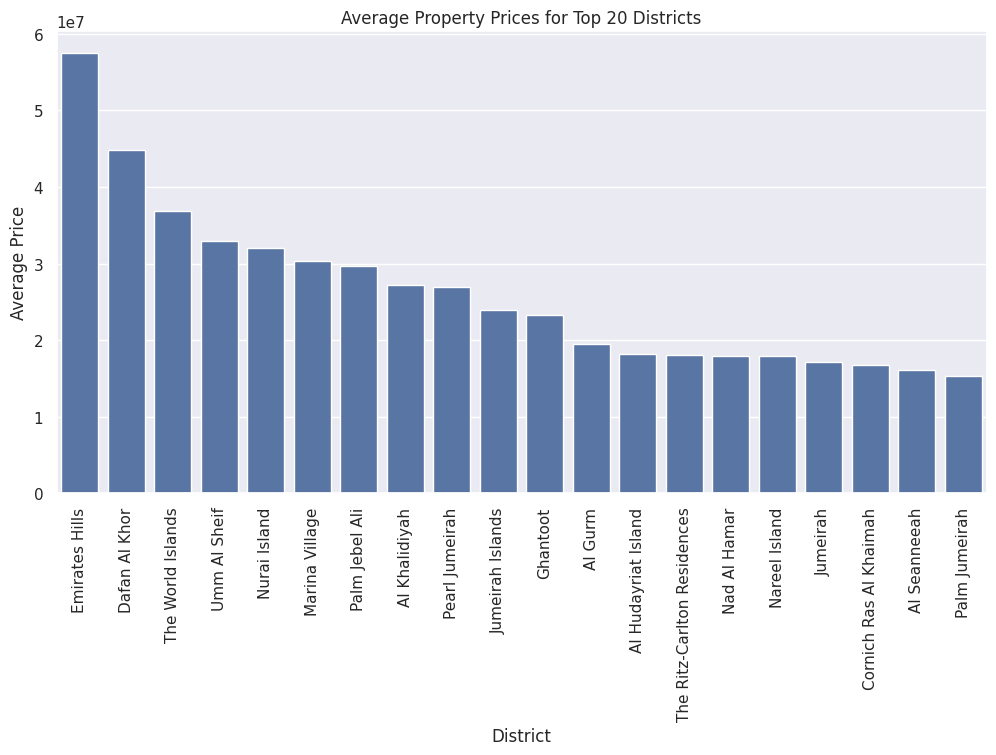

In [18]:
#@title **4.9 Top 20 districts with the highest average prices**
# Group the data by district and calculate the average price for each district
district_avg_prices = prop.groupby('District')['Price'].mean().sort_values(ascending=False)

# Get the top 20 districts with the highest average prices
top_20_districts = district_avg_prices.head(20)

# Print the top 20 districts
print("Top 20 districts with the highest average prices:\n", top_20_districts)

# Create a bar plot to visualize the average prices for the top 20 districts
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_districts.index, y=top_20_districts.values)
plt.title('Average Property Prices for Top 20 Districts')
plt.xlabel('District')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()


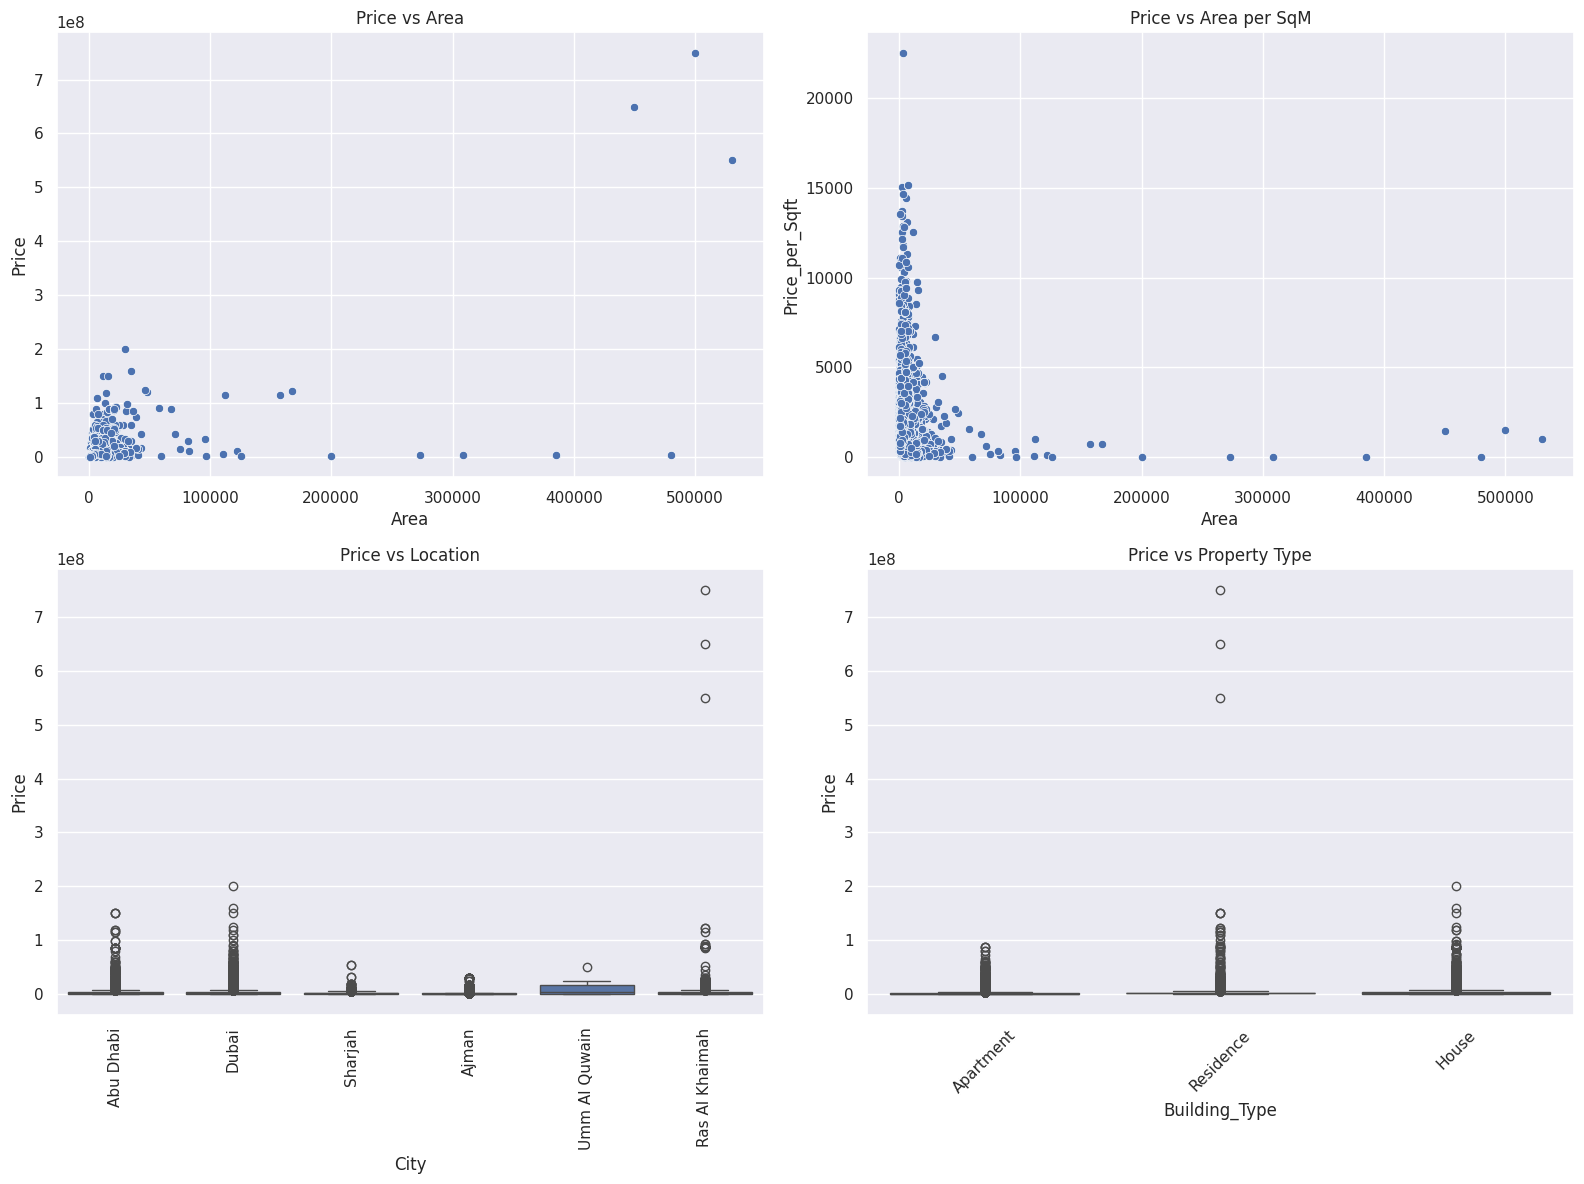

In [19]:
#@title **4.10 Relationship between price with area,Price_per_Sqft,Location, Property Type**
# Price vs Area
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Scatter Plot 1: Price vs Area
sns.scatterplot(x='Area', y='Price', data=prop, ax=axs[0, 0])
axs[0, 0].set_title('Price vs Area')

# Scatter Plot 2: Price vs Area per Square foot
sns.scatterplot(x='Area', y='Price_per_Sqft', data=prop, ax=axs[0, 1])
axs[0, 1].set_title('Price vs Area per SqM')

# Box Plot 1: Price vs Location (City)
sns.boxplot(x='City', y='Price', data=prop, ax=axs[1, 0])
axs[1, 0].set_title('Price vs Location')
axs[1, 0].tick_params(axis='x', rotation=90)

# Box Plot 2: Price vs Property Type (Building_Type)
sns.boxplot(x='Building_Type', y='Price', data=prop, ax=axs[1, 1])
axs[1, 1].set_title('Price vs Property Type')
axs[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


1. Top Left: Price vs Area
   This scatter plot shows the relationship between the property price and the area (in square meters).
   It indicates that generally, as the area increases, the price also increases. However, there's a wide spread of prices for a given area, suggesting that other factors also influence the price.
2. Top Right: Price vs Area per SqM
   This scatter plot shows the relationship between the price per square meter and the total area.
   It suggests that smaller properties tend to have a higher price per square meter. As the area increases, the price per square meter generally decreases.
3. Bottom Left: Price vs Location (City)
   This box plot shows the distribution of property prices across different cities.
   Properties in Abu Dhabi and Dubai tend to have higher prices compared to other cities. Umm Al Quwain has the lowest property prices among the listed cities.
4. Bottom Right: Price vs Property Type
   This box plot shows the distribution of property prices across different property types (Apartment, Residence, House).
   The prices of Houses and Residences appear to be higher on average compared to Apartments. However, there are outliers in all categories indicating a wide range of prices within each property type.

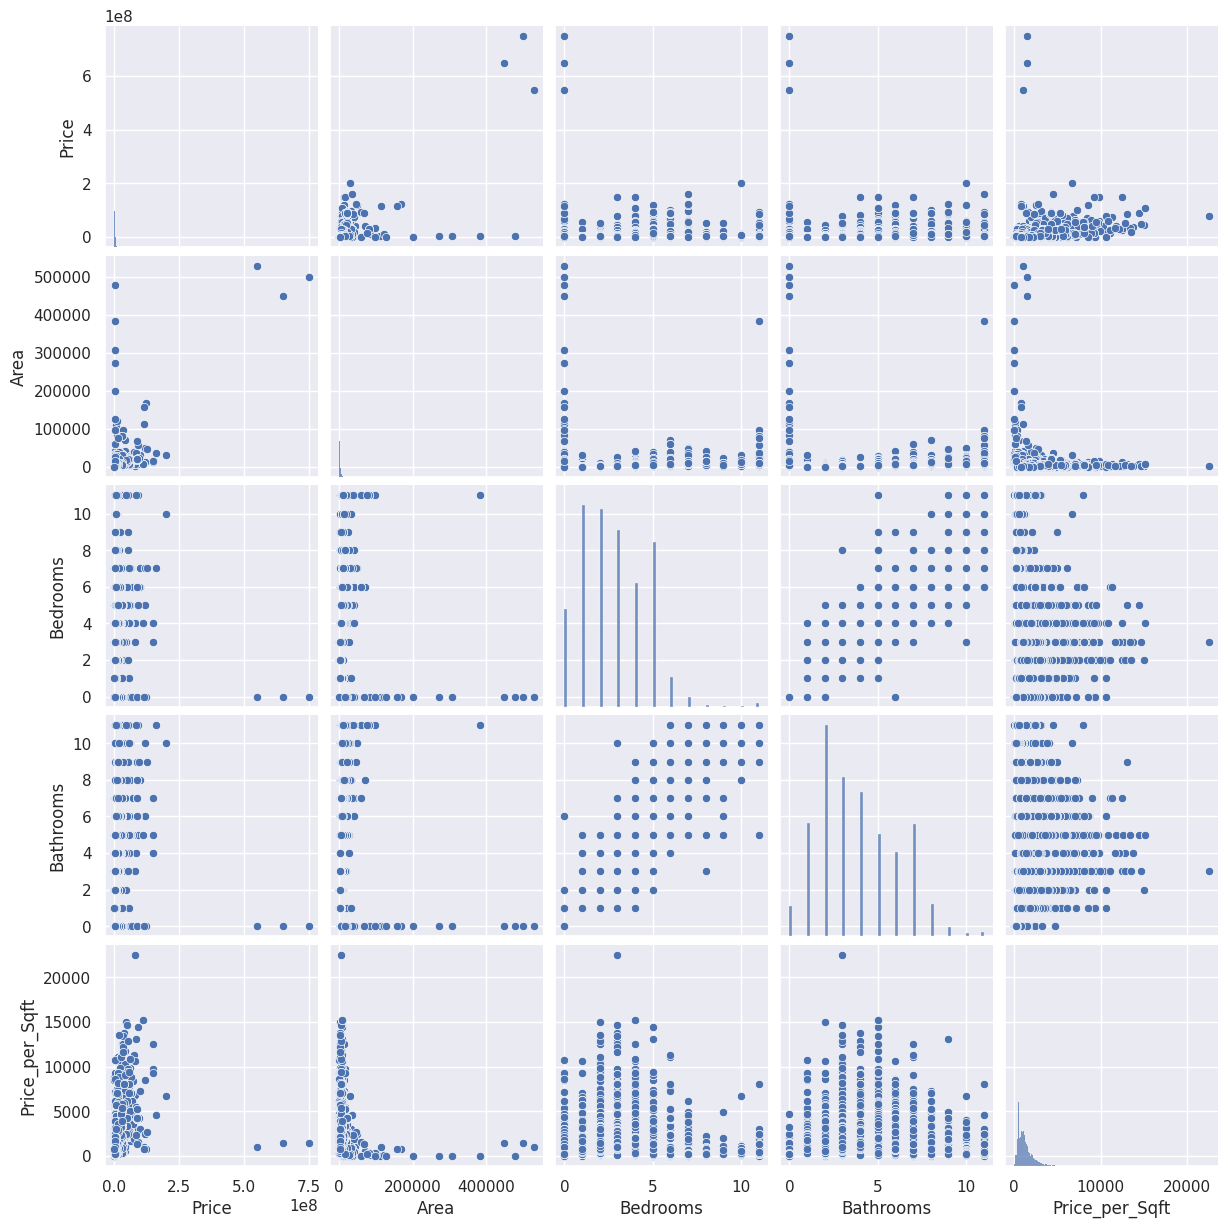

In [20]:
#@title **4.11 Pairplot**
#Analyze relationships between multiple numerical variables.
sns.pairplot(prop[['Price', 'Area', 'Bedrooms', 'Bathrooms','Price_per_Sqft']])
plt.show()




In [21]:
#@title **4.12 Missing Data**
prop.isnull().sum()

,0
Building_Type,0
Latitude,0
Longitude,0
Area,0
Bedrooms,0
Bathrooms,6
City,0
District,0
View,38868
Bulding_Descripton,0


In [22]:
#@title **4.12 Dealing With Missing Data**

prop.drop(columns = ['Bulding_Descripton','View'], inplace=True)
prop.reset_index(drop=True, inplace=True)

## **5. Feature Engineering**

In [23]:
#@title **5.1 Create new features**
prop['TotalRooms'] = prop['Bedrooms'] + prop['Bathrooms']

In [24]:
prop.shape

(45350, 12)

In [25]:
prop['District']=prop['District'].apply(lambda x: x.strip())
District_stats=prop.groupby('District')['District'].agg('count').sort_values(ascending=False)
District_less_than_10= District_stats[District_stats <= 10]
prop['District']=prop['District'].apply(lambda x: 'Others' if x in District_less_than_10 else x)

## **6. Preparing data for modeling**

In [26]:
# @title  **6.1 Removing Outliers**
Q1 = prop['Price'].quantile(0.25)
Q3 = prop['Price'].quantile(0.75)
IQR = Q3 - Q1
prop = prop[~((prop['Price'] < (Q1 - 1.5 * IQR)) | (prop['Price'] > (Q3 + 1.5 * IQR)))]

#Using IQR to remove outliers in Area
Q1 = prop['Area'].quantile(0.25)
Q3 = prop['Area'].quantile(0.75)
IQR = Q3 - Q1
prop = prop[~((prop['Area'] < (Q1 - 1.5 * IQR)) | (prop['Area'] > (Q3 + 1.5 * IQR)))]



In [27]:
prop_6 = prop[~(prop.Area / prop.TotalRooms < 200)]

In [28]:
prop_6.shape

(38664, 12)

In [29]:
def remove_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in prop.groupby(['City']):
    m = np.mean(subdf.Price_per_Sqft)
    st = np.std(subdf.Price_per_Sqft)
    reduced_df = subdf[(subdf.Price_per_Sqft > (m-st)) & (subdf.Price_per_Sqft <= (m+st))]
    df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out
prop = remove_outliers(prop_6)
prop.shape

(6358, 12)

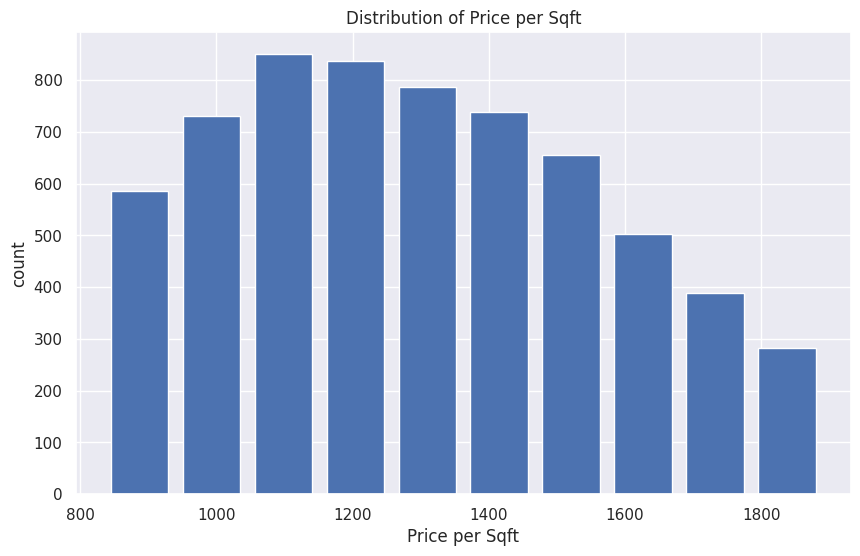

In [30]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.hist(prop['Price_per_Sqft'], rwidth=0.8)
plt.xlabel('Price per Sqft')
plt.ylabel('count')
plt.title('Distribution of Price per Sqft')
plt.show()

In [31]:
prop.drop(columns=['Price_per_Sqft','Latitude','Longitude'], inplace=True)

In [32]:
# Identify categorical and numerical columns
categorical_cols = ['Building_Type', 'District', 'City']  # Including 'City'
numerical_cols = [col for col in prop.columns if col not in categorical_cols + ['Price']]

In [33]:
# Define preprocessors for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [34]:
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
categorical_encoded = one_hot_encoder.fit_transform(prop[categorical_cols])
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_cols))

In [35]:
# Merge encoded categorical features back to the DataFrame
prop = pd.concat([prop, categorical_encoded_df], axis=1)
prop.drop(columns=categorical_cols, inplace=True)

In [36]:
X = prop.drop('Price', axis=1)
y = prop['Price']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
rf_reg = RandomForestRegressor()
lr_reg = LinearRegression()
lasso_reg = Lasso()
gb_reg = GradientBoostingRegressor()


In [39]:
# Define the parameter grids
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
param_grid_lr = {
    'fit_intercept': [True, False],
}
param_grid_lasso = {
    'alpha': np.logspace(-4, 0, 10),
    'fit_intercept': [True, False],
    'max_iter': [100, 200, 300]
}
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

# Number of iterations for RandomizedSearchCV
n_iter_search = 10

In [40]:
# Grid Search for Random Forest
random_search_rf = RandomizedSearchCV(estimator=rf_reg, param_distributions=param_grid_rf, n_iter=n_iter_search, cv=3, n_jobs=-1, verbose=2)
random_search_rf.fit(X_train, y_train)
print("Best Parameters for Random Forest:", random_search_rf.best_params_)
best_rf_reg = random_search_rf.best_estimator_

# Grid Search for Linear Regression
random_search_lr = RandomizedSearchCV(estimator=lr_reg, param_distributions=param_grid_lr, n_iter=n_iter_search, cv=3, n_jobs=-1, verbose=2)
random_search_lr.fit(X_train, y_train)
print("Best Parameters for Linear Regression:", random_search_lr.best_params_)
best_lr_reg = random_search_lr.best_estimator_

#Grid Search for Lasso Regression
random_search_lasso = RandomizedSearchCV(estimator=lasso_reg, param_distributions=param_grid_lasso, n_iter=n_iter_search, cv=3, n_jobs=-1, verbose=2)
random_search_lasso.fit(X_train, y_train)
print("Best Parameters for Lasso Regression:", random_search_lasso.best_params_)
best_lasso_reg = random_search_lasso.best_estimator_

#Grid Search for Gradient Boosting
random_search_gb = RandomizedSearchCV(estimator=gb_reg, param_distributions=param_grid_gb, n_iter=n_iter_search, cv=3, n_jobs=-1, verbose=2)
random_search_gb.fit(X_train, y_train)
print("Best Parameters for Gradient Boosting:", random_search_gb.best_params_)
best_gb_reg = random_search_gb.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 20}
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Parameters for Linear Regression: {'fit_intercept': False}
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for Lasso Regression: {'max_iter': 300, 'fit_intercept': False, 'alpha': 1.0}
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for Gradient Boosting: {'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.1}


In [41]:
# Cross-validation with Random Forest
cv_scores_rf = cross_val_score(best_rf_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Random Forest Cross-Validation MSE Scores:", -cv_scores_rf)
print("Random Forest Average Cross-Validation MSE:", -cv_scores_rf.mean())

# Cross-validation with Gradient Boosting
cv_scores_gb = cross_val_score(best_gb_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Gradient Boosting Cross-Validation MSE Scores:", -cv_scores_gb)
print("Gradient Boosting Average Cross-Validation MSE:", -cv_scores_gb.mean())

# Cross-validation with Lasso Regression
cv_scores_gb = cross_val_score(best_lasso_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Lasso Regression Cross-Validation MSE Scores:", -cv_scores_gb)
print("Lasso Regression Average Cross-Validation MSE:", -cv_scores_gb.mean())

#Cross-validation with Linear Regression
cv_scores_gb = cross_val_score(best_lr_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Linear Regression Cross-Validation MSE Scores:", -cv_scores_gb)
print("Linear Regression Average Cross-Validation MSE:", -cv_scores_gb.mean())


Random Forest Cross-Validation MSE Scores: [4.67778104e+10 5.94319338e+10 4.91701281e+10 5.25553401e+10
 5.30351849e+10]
Random Forest Average Cross-Validation MSE: 52194079451.07734
Gradient Boosting Cross-Validation MSE Scores: [4.70650644e+10 5.48519874e+10 5.00341213e+10 5.10097563e+10
 5.46164683e+10]
Gradient Boosting Average Cross-Validation MSE: 51515479552.52142
Lasso Regression Cross-Validation MSE Scores: [1.26514630e+11 1.44808431e+11 1.45071510e+11 1.24670651e+11
 1.25614573e+11]
Lasso Regression Average Cross-Validation MSE: 133335958999.16853
Linear Regression Cross-Validation MSE Scores: [1.26006328e+11 1.44808141e+11 1.44609148e+11 1.24672083e+11
 1.25617168e+11]
Linear Regression Average Cross-Validation MSE: 133142573581.8149


In [42]:
#train models
best_lr_reg.fit(X_train, y_train)
best_lasso_reg.fit(X_train, y_train)
best_rf_reg.fit(X_train, y_train)
best_gb_reg.fit(X_train, y_train)





GradientBoostingRegressor(max_depth=10, n_estimators=50)

In [43]:
y_pred_lr = best_lr_reg.predict(X_test)
y_pred_rf = best_rf_reg.predict(X_test)
y_pred_gb = best_gb_reg.predict(X_test)
y_pred_lasso = best_lasso_reg.predict(X_test)

In [44]:
models = {
    'Linear Regression': y_pred_lr,
    'Lasso Regression': y_pred_lasso,
    'Random Forest': y_pred_rf,
    'Gradient Boosting': y_pred_gb
}

for name, y_pred in models.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - MSE: {mse}, R2: {r2}')

Linear Regression - MSE: 128025571052.33775, R2: 0.9178016625157832
Lasso Regression - MSE: 128025402410.57898, R2: 0.9178017707915916
Random Forest - MSE: 52837657804.20604, R2: 0.9660757800776365
Gradient Boosting - MSE: 53486001496.131165, R2: 0.9656595134431152


In [45]:
# Make predictions with the best models


# Display predictions
print("Linear Regression Predictions:", y_pred_lr[:5])
print("Random Forest Predictions:", y_pred_rf[:5])
print("Gradient Boosting Predictions:", y_pred_gb[:5])
print("Lasso Predictions:", y_pred_lasso[:5])


Linear Regression Predictions: [2283753.65712911 2751885.55556762  957922.85486393 1464074.64951884
 1475126.97166183]
Random Forest Predictions: [2589959.74988745 2700730.23809524 1102346.38078546 1499199.84
 1289557.08659341]
Gradient Boosting Predictions: [2426733.23392797 2733947.36195975 1019285.20367232 1499423.04223321
 1280023.65522322]
Lasso Predictions: [2283741.20490009 2751879.80141895  957928.9559733  1464057.3456229
 1475191.87431474]


In [46]:
def predict_price(Area, Bedrooms, Bathrooms, Building_Type, District, City):
    # Create an array of zeros with the same length as the number of columns in X
    x = np.zeros(len(X.columns))

    # Assign values to the respective positions in the feature array
    x[np.where(X.columns == 'Area')[0][0]] = Area
    x[np.where(X.columns == 'Bedrooms')[0][0]] = Bedrooms
    x[np.where(X.columns == 'Bathrooms')[0][0]] = Bathrooms

    # Set the one-hot encoded value for Building_Type
    bt_col = f'Building_Type_{Building_Type}'
    if bt_col in X.columns:
        x[np.where(X.columns == bt_col)[0][0]] = 1

    # Set the one-hot encoded value for District
    district_col = f'District_{District}'
    if district_col in X.columns:
        x[np.where(X.columns == district_col)[0][0]] = 1

    # Set the one-hot encoded value for City
    city_col = f'City_{City}'
    if city_col in X.columns:
        x[np.where(X.columns == city_col)[0][0]] = 1

    # Make the prediction using the trained Gradient Boosting model
    return best_rf_reg.predict([x])[0]


In [47]:
Area = 1147.00
Bedrooms = 2
Bathrooms = 3
Building_Type = "Apartment"
District = "Zayed City"
City = "Abu Dhabi"

# Predict the price
predicted_price = predict_price(Area, Bedrooms, Bathrooms, Building_Type, District, City)
# Calculate price per square foot
price_per_sqft = predicted_price / Area

# Format the predicted price and price per square foot to include commas
formatted_price = f"{predicted_price:,.2f}"
formatted_price_per_sqft = f"{price_per_sqft:,.2f}"

# Print the results
print(f"The predicted price for the property is: {formatted_price} AED")
print(f"The price per square foot is: {formatted_price_per_sqft} AED/sqft")

The predicted price for the property is: 1,570,774.00 AED
The price per square foot is: 1,369.46 AED/sqft


In [48]:
joblib.dump(best_gb_reg, 'Real_state_gb_reg.pkl')
print("Model saved as 'Real_state_gb_reg.pkl'")

Model saved as 'Real_state_gb_reg.pkl'


In [49]:
model = joblib.load('Real_state_gb_reg.pkl')  # Replace with your actual model file

# Title of the app
st.title("UAE Real Estate Price Prediction")

# Input features
building_type = st.selectbox("Building Type", ['Apartment', 'Residence', 'House'])  # Replace with actual types
latitude = st.number_input("Latitude", min_value=24.0, max_value=26.0, value=25.0)
longitude = st.number_input("Longitude", min_value=54.0, max_value=56.0, value=55.0)
area = st.number_input("Area (sq.ft)", min_value=50, max_value=1000, value=100)
bedrooms = st.number_input("Bedrooms", min_value=1, max_value=10, value=2)
bathrooms = st.number_input("Bathrooms", min_value=1, max_value=10, value=1)
city = st.selectbox("City", ['Abu Dhabi', 'Dubai', 'Sharjah', 'Ajman', 'Umm Al Quwain','Ras Al Khaimah'])  # Replace with actual cities
district = st.selectbox("District", ['Al Raha Beach', 'Yas Island', 'Al Reef', 'Al Reem Island', 'Al Wafrah',
                                    'Saadiyat Island', 'Masdar City', 'Al Raha Gardens', 'Al Matar',
                                    'Al Samha', 'Ramhan Island', 'Al Shamkha', 'Al Maryah Island',
                                    'Zayed City', 'Al Jubail Island', 'Khalifa City', 'Baniyas',
                                    'Al Jurf', 'Al Ghadeer', 'Al Hudayriat Island',
                                    'Abu Dhabi Gate City (Officers City)', 'The Marina',
                                    'Hydra Village', 'Nareel Island', 'Al Mushrif',
                                    'Hadbat Al Zaafran', 'Al Muroor', 'Rabdan', 'Nurai Island',
                                    'Shakhbout City', 'Al Rahba', 'Al Manhal', 'Marina Village',
                                    'Al Gurm', 'Al Khalidiyah', 'Ghantoot', 'Mohammed Bin Zayed City',
                                    'Madinat Zayed', 'Madinat Al Riyadh',
                                    'Between Two Bridges (Bain Al Jessrain)', 'Al Muntazah',
                                    'Al Bateen', 'Al Shawamekh', 'Al Maqtaa', 'Al Qurm', 'Arjan',
                                    'Business Bay', 'Liwan', 'Jumeirah Village Circle (JVC)', 'Mudon',
                                    'The Views', 'Town Square', 'Jumeirah',
                                    'Jumeirah Beach Residence (JBR)', 'Dubai Creek Harbour',
                                    'Dubai Maritime City', 'Dubai Hills Estate', 'Dubai Marina',
                                    'Downtown Dubai', 'Al Furjan', 'Mohammed Bin Rashid City',
                                    'Jumeirah Village Triangle (JVT)', 'Palm Jebel Ali', 'Dubai South',
                                    'Arabian Ranches 3', 'Reem', 'Umm Suqeim', 'The Lakes',
                                    'Sobha Hartland', 'Discovery Gardens',
                                    'Jumeirah Lake Towers (JLT)', 'The World Islands', 'Tilal Al Ghaf',
                                    'Palm Jumeirah', 'Dubai Sports City', 'The Valley by Emaar',
                                    'Green Community', 'Dubai Residence Complex', 'Jumeirah Park',
                                    'Dubailand', 'Jumeirah Islands', 'Arabian Ranches', "Za'abeel",
                                    'Meydan City', 'Al Wasl', 'Dubai Studio City', 'DAMAC Hills',
                                    'Dubai Harbour', 'Mina Rashid', 'The Acres',
                                    'Dubai Production City (IMPZ)', 'DAMAC Hills 2 (Akoya by DAMAC)',
                                    'Motor City', 'Majan', 'International City', 'The Villa',
                                    'Bukadra', 'Wasl Gate', 'DIFC', 'The Meadows',
                                    'Dubai Internet City', 'Al Jaddaf', 'Expo City', 'The Springs',
                                    'Al Barsha', 'Dubai Silicon Oasis (DSO)', 'Nad Al Sheba',
                                    'Culture Village (Jaddaf Waterfront)', 'Serena',
                                    'Dubai Science Park', 'DAMAC Lagoons', 'Ras Al Khor',
                                    'Falcon City of Wonders', 'Jumeirah Golf Estates',
                                    'Living Legends', 'Jebel Ali', 'Bluewaters Island',
                                    'Dubai Festival City', 'The Hills', 'Dubai Investment Park (DIP)',
                                    'Al Barari', 'Dubai Media City', 'Dubai Islands',
                                    'The Oasis by Emaar', 'Barsha Heights (Tecom)', 'The Greens',
                                    'Muhaisnah', 'Jumeirah Heights', 'Remraam', 'Al Warsan',
                                    'City of Arabia', 'Dubai Design District', 'Mirdif', 'Bur Dubai',
                                    'Al Quoz', 'Arabian Ranches 2', 'Al Sufouh', 'Liwan 2',
                                    'Dubai Industrial City', 'Al Satwa', 'Deira', 'Umm Al Sheif',
                                    'World Trade Centre', 'Nad Al Hamar', 'Emirates Hills',
                                    'Pearl Jumeirah', 'Al Mina', 'Muwaileh', 'Aljada', 'Al Khan',
                                    'Al Tai', 'Al Rahmaniya', 'Tilal City', 'Al Taawun', 'Al Mamzar',
                                    'Barashi', 'Al Suyoh', 'Al Qasimia', 'Al Majaz',
                                    'Sharjah Garden City', 'Sharjah Waterfront City', 'Hoshi',
                                    'Al Rifa', 'Al Zubair', 'Al Nahda (Sharjah)', 'Khor Fakkan',
                                    'Bu Daniq', 'Al Hazannah', 'Al Rifah', 'Al Metraq', 'Sharqan',
                                    'Sharjah University City', 'Al Sweihat', 'Al Gharayen', 'Al Fisht',
                                    'Muzairah', 'Al Qasba', 'Al Jazzat', 'Al Riqaibah', 'Al Qadisiya',
                                    'Al Ghubaiba', 'Al Nekhailat', 'Al Hamriyah', 'Al Azra',
                                    'Al Sabkha', 'Al Khaledia Suburb', 'Al Sehma', 'Al Ramaqiya',
                                    'Rodhat Al Qrt', 'Al Ghafia', 'Al Tay East', 'Al Goaz',
                                    'Wasit Suburb', 'Samnan', 'Halwan Suburb', 'Bu Tina',
                                    'Al Khezamia', 'Al Ramtha', 'Abu Shagara', 'Al Fayha', 'Al Noaf',
                                    'Al Shahba', 'Al Belaida', 'Muwafjah', 'Al Ramla', 'Jwezaa',
                                    'Muwaileh Commercial', 'Emirates Industrial City', 'Al Darari',
                                    'Turrfa', 'Al Yash', 'Al Sajaa Industrial', 'Al Nabba',
                                    'Saif Zone (Sharjah International Airport Free Zone)', 'Al Amerah',
                                    'Al Alia', 'Al Yasmeen', 'Al Zahya', 'Al Rawda', 'Al Helio',
                                    'Al Nuaimiya', 'Al Bustan', 'Al Rashidiya', 'Ajman Downtown',
                                    'Al Bahia', 'Emirates City', 'Al Mowaihat', 'Corniche Ajman',
                                    'Al Zorah', 'Ajman Uptown', 'Masfout', 'Al Manama',
                                    'Sheikh Maktoum Bin Rashid Street', 'Ajman Free Zone',
                                    'Al Rumaila', 'Garden City', 'Al Hamidiyah', 'Liwara 2',
                                    'Al Raqaib', 'Al Tallah 2', 'Liwara 1', 'Ajman Industrial',
                                    'Musherief', 'Al Sawan', 'Al Zahraa', 'Emirates Lake Towers',
                                    'Al Tallah 1', 'Al Nakhil', 'Sheikh Khalifa Bin Zayed Street',
                                    'Marmooka City', 'Alamra tower', 'New Industrial City',
                                    'Al Salamah', 'Khalifah City', 'Al Humrah', 'Al Ramlah',
                                    'Green Belt', 'Falaj Al Mualla', 'Al Rass', 'Al Butain',
                                    'Al Raudah', 'Al Hawiyah', 'Al Seanneeah', 'Umm Al Quwain Marina',
                                    'Al Maidan', 'Al Salam City', 'Al Khour', 'Old Town Area',
                                    'Al Haditha', 'Mallah', 'Johar', 'Al Riqqah', 'Al Hamra Village',
                                    'Al Marjan Island', 'Mina Al Arab', 'Al Dhait',
                                    'Aljazeera Al Hamra', 'Al Ghubb', 'Seih Al Qusaidat',
                                    'Dafan Al Nakheel', 'Julfar', 'Seih Al Uraibi', 'Khuzam',
                                    'Yasmin Village', 'Al Jazeera - Nad Al Salla', 'Al Seer',
                                    'Seih Al Harf', 'Al Mairid', 'Cornich Ras Al Khaimah', 'Mudfak',
                                    'Dafan Al Khor', 'Al Qusaidat', 'Ras Al Khaimah Gateway',
                                    'Al Mataf', 'Shamal Julphar', 'Al Nakheel', 'Seih Al Ghubb',
                                    'Al Fahlain', 'Suhailah', 'Al Refaa',
                                    'The Ritz-Carlton Residences', 'Al Hudaibah', 'Al Kharran',
                                    'Sidroh', 'Rak City', 'Al Rams', 'Al Salihia', 'Al Uraibi',
                                    'Al Mamourah', 'Al Mukawwrah', 'Al Defan'])  # Replace with actual districts
price_per_sqm = st.number_input("Price per Sq.m", min_value=0, max_value=100000, value=5000)
city_avg_price = st.number_input("City Average Price", min_value=0, max_value=1000000, value=500000)
total_rooms = st.number_input("Total Rooms", min_value=1, max_value=20, value=3)

# Prediction
if st.button("Predict"):
    features = np.array([[building_type, latitude, longitude, area, bedrooms, bathrooms, city, district, price_per_sqm, city_avg_price, total_rooms]])
    prediction = model.predict(features)
    st.write(f"The predicted price is: AED {prediction[0]:.2f}")
    st.write(f"The price per square meter is: AED {prediction[0] / area:.2f}")

2024-08-04 16:55:57.197 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-08-04 16:55:57.200 Session state does not function when running a script without `streamlit run`
